# Unit 4

In [3]:
# Define path for files
path = r'/Users/charlesrambo/Desktop/Bootcamp24/Images/'

# Define path for data
data_path = path.replace('Images', 'Unit 4') + 'SPX.csv'

## Data for Unit

In [2]:
# Code copied from https://stackoverflow.com/questions/58890570/python-yahoo-finance-download-all-sp-500-stocks
import bs4 as bs
import requests
import yfinance as yf
import datetime

# Get list of tickers from Wikipedia
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

# Initialize list to hold tickers
tickers = []

# Loop over rows to get tickers
for row in table.findAll('tr')[1:]:
    
    ticker = row.findAll('td')[0].text
    
    tickers.append(ticker)

# Remove new line command from ticker
tickers = [s.replace('\n', '') for s in tickers]

# Define start and end dates
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2024,5, 31)

# Get the adjusted close from Yahoo Finance 
# Add extra days so we can calculate return at start
data = yf.download(tickers, start = start  - datetime.timedelta(weeks = 1), 
                   end = end, progress = False)['Adj Close']

# Calculate the percent change
data = data.pct_change()

# Subset to just dates after start
data = data.loc[data.index >= start, :]

# Drop rows where everything is missing
data = data.dropna(axis = 0, how = 'all')

# Drop columns where anything is missing
data = data.dropna(axis = 1, how = 'any')

# Save to csv file
data.to_csv(data_path)

data.head()


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-12-26 00:00:00 -> 2024-05-31 00:00:00)')


,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.026238,0.011523,0.001141,-0.032107,-0.039127,-0.019835,-0.002979,-0.007382,0.001049,-0.000488,...,-0.014355,-0.015096,0.055505,-0.021311,0.021998,-0.003148,-0.005222,-0.013883,-0.018778,-0.012392
2019-01-03,-0.036840,-0.074507,-0.099607,-0.032949,-0.047194,-0.015655,-0.034142,-0.039498,-0.060405,-0.004396,...,-0.020978,0.033906,-0.009674,-0.003940,-0.015354,-0.034281,-0.025153,-0.018088,-0.059908,-0.034564
2019-01-04,0.034614,0.065868,0.042689,0.032217,0.028541,0.023662,0.038884,0.048632,0.024278,0.023056,...,0.027023,0.034142,0.040333,0.009785,0.036870,0.042192,0.026026,0.034153,0.041462,0.039235
2019-01-07,0.021235,0.028402,-0.002226,0.014595,0.014976,-0.002274,0.003473,0.013573,0.006289,0.005035,...,0.007375,0.019983,0.017758,-0.004330,0.005200,-0.014789,-0.001093,0.000385,0.015166,0.006017
2019-01-08,0.014659,-0.016085,0.019063,0.004647,-0.012006,0.003798,0.025290,0.014918,0.024396,0.018607,...,0.006398,0.005963,0.031333,0.011597,0.007271,0.009401,-0.001970,-0.022425,0.006697,0.014894


## Covariance Matracies

Recall 

(a) $\Sigma = \left(\begin{array}{c c} 1 &0\\ 0 & 1\end{array}\right)$, <br>
(b) $\Sigma = \left(\begin{array}{c c} 1 &0.5\\ 0.5 & 1\end{array}\right)$, <br>
(c) $\Sigma = \left(\begin{array}{c c} 1 & -0.5\\ -0.5 & 1\end{array}\right)$, and <br>
(d) $\Sigma = \left(\begin{array}{c c} 1 & 1\\ 1 & 1\end{array}\right)$.

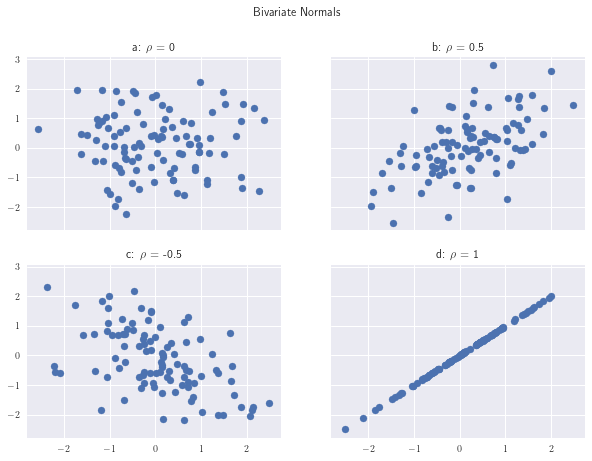

In [71]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Set random seed
np.random.seed(0)

# Create list for problem parts
parts = ['a', 'b', 'c', 'd']

# Create list of covariance matrices
covs = [np.array([[1, 0], [0, 1]]), 
        np.array([[1, 0.5], [0.5, 1]]), 
        np.array([[1, -0.5], [-0.5, 1]]), 
        np.array([[1, 1], [1, 1]])]

# Set up subplots
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, 
                       figsize = (10, 7))

# Loop over titles and covariance matrices 
for i, part, cov in zip(range(4), parts, covs):
    
    # Get the row and column
    row, col = i // 2, i %2

    # Generate values
    vals = multivariate_normal.rvs(mean = np.zeros(2), 
                                   cov = cov, size = 100)
    
    # Get x- and y-coordinates
    x, y = zip(*vals)
    
    # Plot the values
    ax[row, col].scatter(x, y)
    
    # Get title
    title = part + r': $\rho$ = ' + str(cov[0, 1])
    
    # Give the plot a title
    ax[row, col].title.set_text(title)

# Give entire figure title
fig.suptitle('Bivariate Normals')

# Save the figure
plt.savefig(path + r'ex4-1.png')

plt.show()

In [3]:
# Import modules
import pandas as pd

# Load in data; make date the index
data = pd.read_csv(data_path, index_col = 'Date')

# Get covariance matrix
S = data.cov()

S

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
A,0.000342,0.000208,0.000191,0.000105,0.000178,0.000155,0.000192,0.000221,0.000225,0.000131,...,0.000141,0.000226,0.000218,0.000105,0.000122,0.000198,0.000122,0.000155,0.000256,0.000198
AAL,0.000208,0.001444,0.000233,0.000093,0.000125,0.000303,0.000236,0.000192,0.000309,0.000240,...,0.000209,0.000447,0.000684,0.000067,0.000305,0.000322,0.000239,0.000311,0.000337,0.000162
AAPL,0.000191,0.000233,0.000396,0.000102,0.000162,0.000153,0.000217,0.000296,0.000265,0.000127,...,0.000153,0.000245,0.000259,0.000119,0.000128,0.000191,0.000137,0.000153,0.000275,0.000197
ABBV,0.000105,0.000093,0.000102,0.000249,0.000113,0.000117,0.000107,0.000105,0.000107,0.000088,...,0.000089,0.000127,0.000122,0.000081,0.000106,0.000097,0.000079,0.000107,0.000107,0.000108
ABT,0.000178,0.000125,0.000162,0.000113,0.000264,0.000132,0.000159,0.000176,0.000170,0.000107,...,0.000132,0.000182,0.000119,0.000123,0.000080,0.000155,0.000114,0.000142,0.000183,0.000170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.000198,0.000322,0.000191,0.000097,0.000155,0.000216,0.000206,0.000192,0.000242,0.000169,...,0.000172,0.000286,0.000278,0.000131,0.000176,0.000368,0.000157,0.000178,0.000250,0.000167
YUM,0.000122,0.000239,0.000137,0.000079,0.000114,0.000163,0.000149,0.000127,0.000160,0.000120,...,0.000135,0.000216,0.000238,0.000105,0.000132,0.000157,0.000254,0.000165,0.000158,0.000144
ZBH,0.000155,0.000311,0.000153,0.000107,0.000142,0.000188,0.000175,0.000146,0.000194,0.000138,...,0.000144,0.000235,0.000312,0.000096,0.000178,0.000178,0.000165,0.000373,0.000198,0.000150
ZBRA,0.000256,0.000337,0.000275,0.000107,0.000183,0.000200,0.000252,0.000297,0.000329,0.000174,...,0.000166,0.000325,0.000339,0.000102,0.000179,0.000250,0.000158,0.000198,0.000668,0.000231


## Principal Component Analysis (PCA)

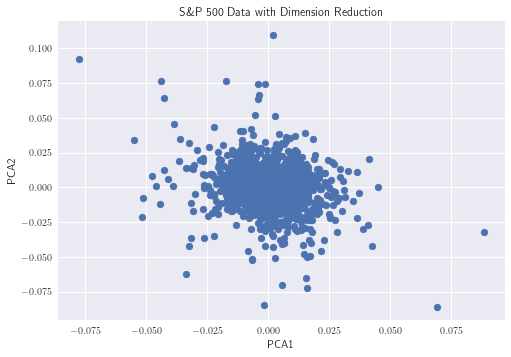

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Use Seaborn style
plt.style.use('seaborn')

# S and data are as calculated previously

# Get the eigenvalues and eigenvectors
evals, evecs = np.linalg.eigh(S)

# Indices in descending order
idx = evals.argsort()[::-1]

# Change order
evecs, evals = evecs[idx], evals[idx]

# Convert the observations to a numpy array
X = data.values

# Get the mean of each firm's return
x_bar = X.mean(axis = 0)

# Demean X
X -= x_bar

# Calculate loadings using the dot product
loadings = X @ evecs[:, 0:2]

# Unpack results
x, y = zip(*loadings)

# Get scatter plot
plt.scatter(x, y)

# Create x- and y-labels
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Give the plot a title
plt.title(r'S\&P 500 Data with Dimension Reduction')

# Save the figure
plt.savefig(path + r'ex4-2.png')

plt.show()


## Clipping Covariance Matrices

In [84]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the random seed
np.random.seed(0)

# Generate normal random variables
X = norm.rvs(size = (50, 100))

# Get the covariance matrix
S = np.cov(X, rowvar = False)

# Get the eigenvalues
evals, _ =  np.linalg.eigh(S)

print(f'The sample covariance matrix has {np.sum(np.isclose(evals, 0))}',
      r'eigenvalues numerically indistinguishable from 0.')

The sample covariance matrix has 51 eigenvalues numerically indistinguishable from 0.


In [89]:
# Get the standard deviations
stds = np.sqrt(np.diag(S))

# Get the correlation matrix
C = np.diag(1/stds) @ S @ np.diag(1/stds)

# Get the eigenvalues and vectors of C
evals_c, evecs_c = np.linalg.eigh(C)

# Make lam_min small positive outside of np.isclose threshold
lam_min = 1e-7

# Replace eigenvalues that are too small
evals_c[evals_c < lam_min] = lam_min

# Reconstruct correlation matrix
C_new = evecs_c @ np.diag(evals_c) @ evecs_c.T

# Make sure still correlation matrix
C_new = (np.diag(np.sqrt(1/np.diag(C_new))) @ C_new
            @ np.diag(np.sqrt(1/np.diag(C_new))))

# Multiply by standard deviations to make it covariance matrix
S_new = np.diag(stds) @ C_new @ np.diag(stds)

# Get the eigenvalues
evals_new, _ =  np.linalg.eigh(S_new)

print(f'The new covariance matrix has {np.sum(np.isclose(evals_new, 0))}',
      r'eigenvalues numerically indistinguishable from 0.')

The new covariance matrix has 0 eigenvalues numerically indistinguishable from 0.


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Set the random seed
np.random.seed(0)

# Start the clock
start_time = time.perf_counter()

# Generate normal random variables
X = norm.rvs(size = (100_000, 10_000))

# Get the number of observations and variables
T, N = X.shape

# Get correlation matrix
C = np.corrcoef(X, rowvar = False)

# q is the number of observations divided by the number of variables
q = T/N

# Get eigenvalues
evals, _ = np.linalg.eigh(C)

# Get support of Marchenko–Pastur distribution
lam_minus, lam_plus = (1 - np.sqrt(1/q))**2, (1 + np.sqrt(1/q))**2 
        
# Define pdf
def f(lam):
    
    # Support of Marchenko–Pastur distribution
    if lam_minus <= lam <= lam_plus:
    
        return q/(2 * np.pi) * np.sqrt((lam_plus - lam) * (lam - lam_minus))/lam
                
    else:
        
        return 0

# Get lam_vals
lam_vals = np.linspace(lam_minus, lam_plus, 100)

# Get density values
f_vals = f(lam_vals)

# Plot histogram
plt.hist(evals, density = True, bins = int(np.sqrt(N)), label = 'Simulated Distribution')

# Plot density
plt.plot(lam_vals, f_vals, label = 'Density')

# Add legend
plt.legend()

# Add x-label
plt.xlabel(r'$\lambda$')

# Add y-label
plt.ylabel(r'Density')

# Add title to plot
plt.title(r'Marchenko–Pastur Distribution')

# Save the figure
plt.savefig(path + r'ex4-3.png')

plt.show()

print(f'This script took {(time.perf_counter() - start_time)/60:.2f} minutes to run.')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Import modules
import pandas as pd

# Load in data
data = pd.read_csv(data_path, index_col = 'Date')

# Get covariance matrix; convert to numpy array
S = data.cov().values

# Get the standard deviations
stds = np.sqrt(np.diag(S))

# Calculate correlation matrix
C = np.diag(1/stds) @ S @ np.diag(1/stds)

# Get the eigenvalues and vectors
evals, evecs =  np.linalg.eigh(C)

# Save q
q = data.shape[0]/data.shape[1]

# Get support of Marchenko–Pastur distribution
lam_minus, lam_plus = (1 - np.sqrt(1/q))**2, (1 + np.sqrt(1/q))**2 
        
# Define pdf
def f(lam):
    
    # Suppose of Marchenko–Pastur distribution
    if lam_minus <= lam <= lam_plus:
    
        return q/(2 * np.pi) * np.sqrt((lam_plus - lam) * (lam - lam_minus))/lam
                
    else:
        
        return 0
    
# Get lam_vals
lam_vals = np.linspace(lam_minus, lam_plus, 100)

# Get density values
f_vals = f(lam_vals)

# Plot histogram
plt.scatter(evals[evals > lam_plus], np.zeros(np.sum(evals > lam_plus)), 
            label = 'Signal Eigenvalues')

plt.scatter(evals[evals <= lam_plus], np.zeros(np.sum(evals <= lam_plus)), 
            label = 'Noise Eigenvalues', color = 'gray')

# Plot density
plt.plot(lam_vals, f_vals, label = 'Density', color = 'green')

# There are 3 eigenvalues much larger than 10
plt.xlim([0, 10])

# Add legend
plt.legend()

# Add x-label
plt.xlabel(r'$\lambda$')

# Add y-label
plt.ylabel(r'Density')

# Add title to plot
plt.title(r'S\&P 500 Constituents')

# Save the figure
plt.savefig(path + r'ex4-4.png')

plt.show()

In [7]:
# Initialize new eigenvalues
evals_new = evals

# Replace noise eigenvalues with mean
evals_new[evals_new < lam_plus] = np.mean(evals_new[evals_new < lam_plus])

# Construct new correlation matrix
C_new = evecs @ np.diag(evals_new) @ evecs.T

# Make sure still correlation matrix
C_new = np.diag(1/np.sqrt(np.diag(C_new))) @ C_new @ np.diag(1/np.sqrt(np.diag(C_new)))

# Make new covariance matrix
S_new = np.diag(stds) @ C_new @ np.diag(stds)

## Stochastic Calculus

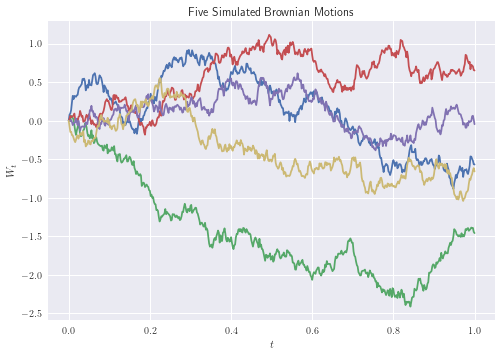

In [8]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Set the random seed
np.random.seed(0)

# Break up into n discrete intervals
n = 500

# Simulate five Brownian motions
for _ in range(5):
    
    # Simulate Brownian motion for t in [0, 1]
    Z = norm.rvs(scale = np.sqrt(1/n), size = n)
    
    # Take the cumulative sum; add 0 for the t = 0 value
    W = np.insert(np.cumsum(Z), 0, 0)
    
    # Plot results
    plt.plot(np.linspace(0, 1, n + 1), W)
    
# Add x-label
plt.xlabel(r'$t$')

# Add y-label
plt.ylabel(r'$W_t$')

# Add title to plot
plt.title(r'Five Simulated Brownian Motions')

# Save the figure
plt.savefig(path + r'ex4-5.png')

plt.show()

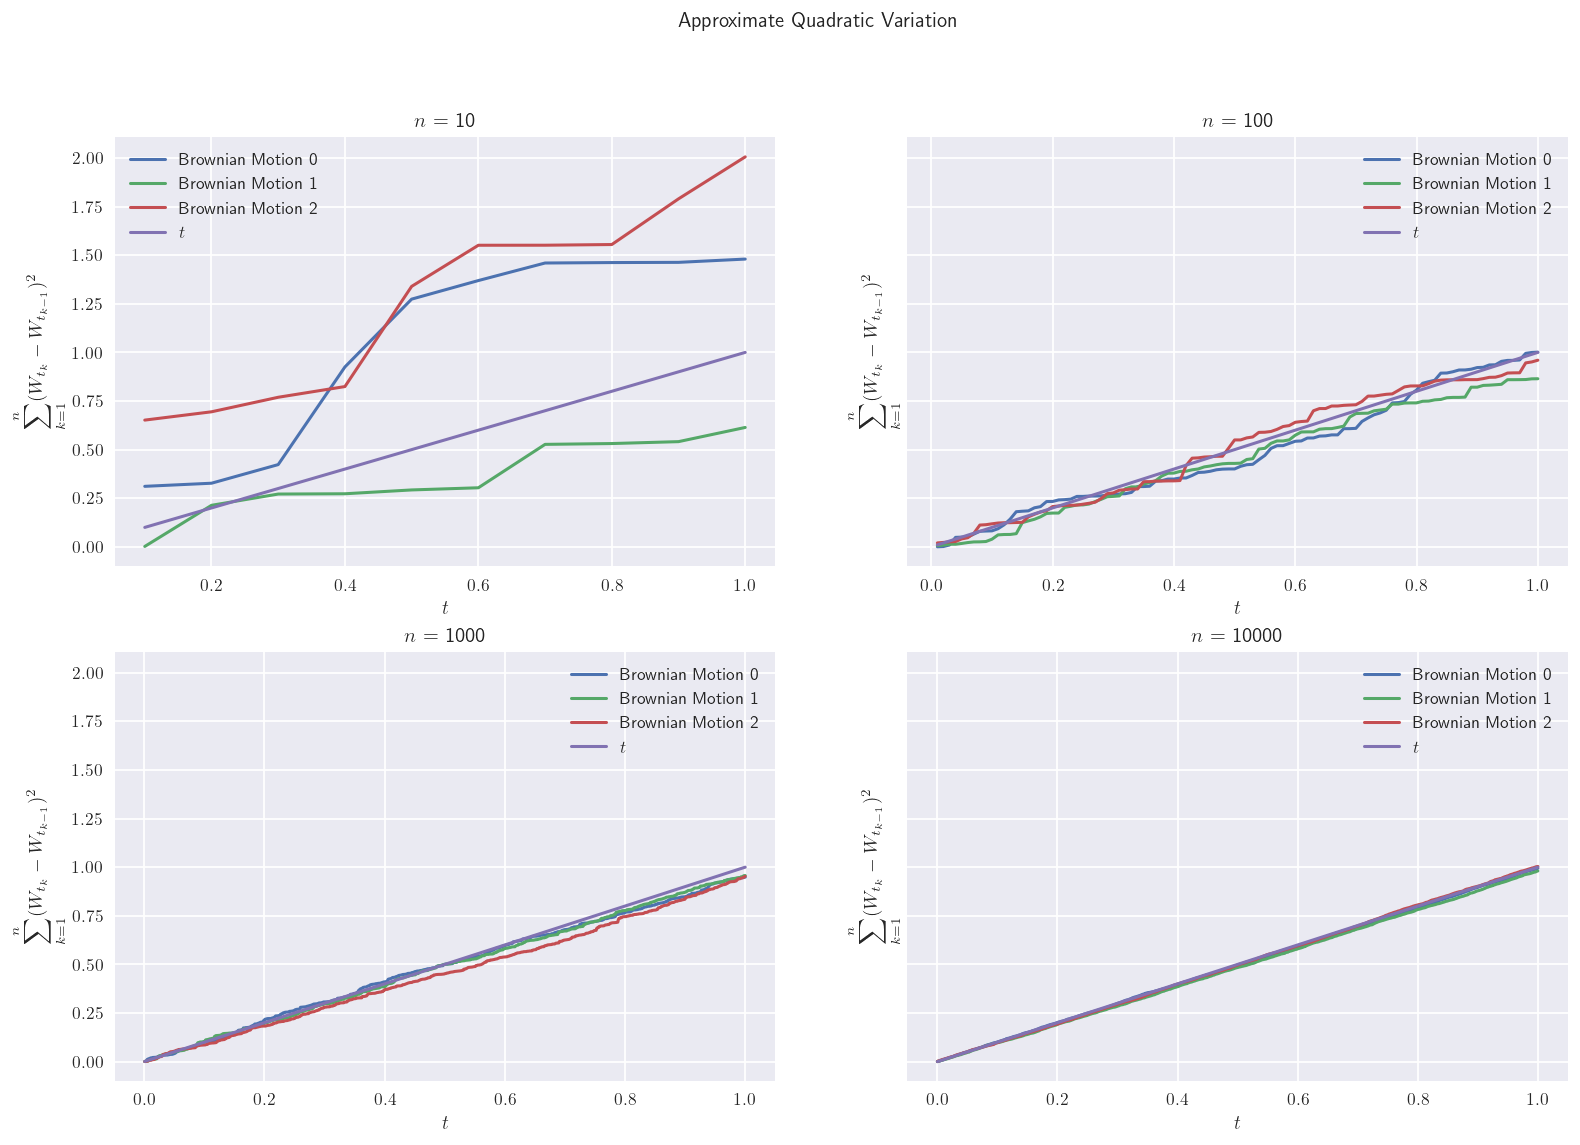

In [4]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Set the random seed
np.random.seed(0)

# Define n-values
n_vals = [10, 100, 1000, 10000]

# Set up subplots
fig, ax = plt.subplots(2, 2, sharey = True, figsize = (15, 10),
                      dpi = 125)

# Simulate five Brownian motions
for i, n in enumerate(n_vals):
    
    # Get row and column
    row, col = i//2, i % 2
    
    # Difference of two Brownian motions is normal
    dW = norm.rvs(scale = np.sqrt(1/n), size = (3, n))
    
    # Calculate quadratic variance
    quad_var = np.cumsum(dW**2, axis = 1)
    
    # Plot results
    for j in range(3):
        
        ax[row, col].plot(np.linspace(1/n, 1, n), quad_var[j, :], label = f'Brownian Motion {j}')

    # Plot t
    ax[row, col].plot(np.linspace(1/n, 1, n), np.linspace(1/n, 1, n), 
         label = r'$t$')
    
    # Add x-label
    ax[row, col].set_xlabel(r'$t$')

    # Add y-label
    ax[row, col].set_ylabel(r'$\displaystyle\sum_{k = 1}^{n} (W_{t_k} - W_{t_{k - 1}})^2$')
    
    # Give plot a title
    ax[row, col].set_title(f'$n$ = {n}')
    
    # Add legend
    ax[row, col].legend()

# Add title to plot
plt.suptitle(r'Approximate Quadratic Variation')

# Save the figure
plt.savefig(path + r'ex4-6.png')

plt.show()